In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['target'] = pd.Series(iris.target)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
y = iris_data[['target']]
X = iris_data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [5]:
y_pred = clf_model.predict(X_test)

In [6]:
print(f'Accuracy Score: {metrics.accuracy_score(y_test, y_pred)*100:}%')

Accuracy Score: 100.0%


In [7]:
pred_data = {'True val': y_test, 'Predict val': y_pred}
pred_data


{'True val':      target
 73        1
 18        0
 118       2
 78        1
 76        1
 31        0
 64        1
 141       2
 68        1
 82        1
 110       2
 12        0
 36        0
 9         0
 19        0
 56        1
 104       2
 69        1
 55        1
 132       2
 29        0
 127       2
 26        0
 128       2
 131       2
 145       2
 108       2
 143       2
 45        0
 30        0
 22        0
 15        0
 65        1
 11        0
 42        0
 146       2
 51        1
 27        0
 4         0
 32        0
 142       2
 85        1
 86        1
 16        0
 10        0,
 'Predict val': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0])}

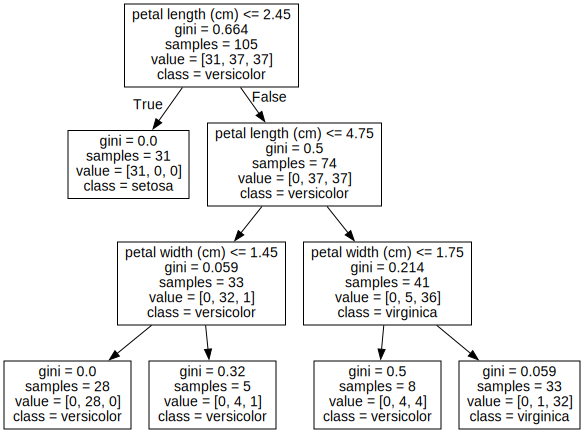

In [8]:
target = list(iris_data['target'].unique())
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=iris.target_names)
graph = graphviz.Source(dot_data)
graph

In [9]:
importance = clf_model.feature_importances_

In [10]:
sorted_imoptance = pd.DataFrame({'feature': feature_names, 'importance': importance}).sort_values('importance', ascending=False)
sorted_imoptance

,feature,importance
2,petal length (cm),0.948893
3,petal width (cm),0.051107
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
